In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from train_regression import full_dataset_predictions

# Figures for Paper

* This is a short notebook that can be used to generate further figures pertaining to particle size experiments.

* If predictions across the full dataset are not already available, uncomment the code below and run.

* Otherwise leave commented and load the predictions from csv

In [4]:
# ### Get full dataset predictions if not already done ###
# config = {
#     "data_dir": "./Particle_Size-data",
#     "lr": 0.002,
#     "weight_decay": 0.002,
#     "num_epochs": 200,
#     "omega": 1.0,
#     "film_hidden_size": 32,
#     "film_activation": "relu",
#     "head_hidden_size": 1024,
#     "mse": True,
#     "width": 2,
#     "dropout": 0.0,
#     "seed": 0,
#     "device": "cuda"
#     }

# df = full_dataset_predictions(config, False, save_path='Trained_Models/PPSNet')
# df.to_csv('./results/PPSNet_relu_predictions.csv', index=False)

df = pd.read_csv('./results/PPSNet_relu_predictions.csv')

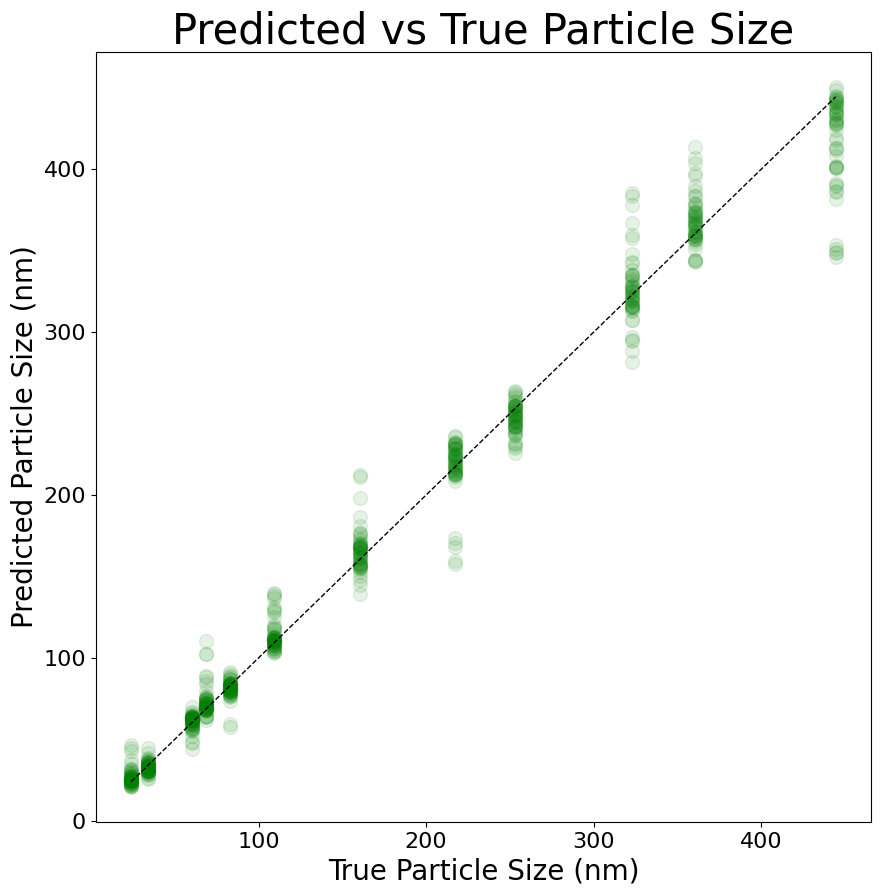

In [5]:
# Predicted particle size vs actual particle size

plt.figure(figsize=(10, 10))

plt.plot([df['denormed_targets'].min(), df['denormed_targets'].max()], 
         [df['denormed_targets'].min(), df['denormed_targets'].max()], 
         color='black', linestyle='--', linewidth=1)

plt.scatter(df['denormed_targets'], df['denormed_outputs'], s=100, alpha=0.1, c='green')

plt.xlabel('True Particle Size (nm)', fontsize=20)
plt.ylabel('Predicted Particle Size (nm)', fontsize=20)
plt.title('Predicted vs True Particle Size', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


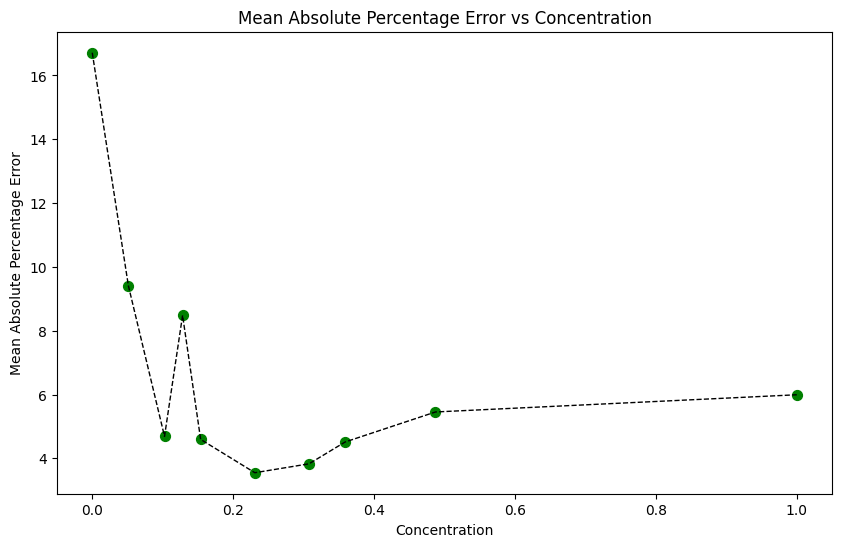

In [6]:
### Mean Absolute Percentage Error vs Concentration ###

ape = ((df['denormed_outputs'] - df['denormed_targets']).abs() / df['denormed_targets']) * 100
df['ape'] = ape

apes = df.groupby('concentrations')['ape'].mean()

mean_apes_list = apes.tolist()

plt.figure(figsize=(10, 6))
plt.plot(df['concentrations'].unique(), mean_apes_list, color='black', linestyle='--', linewidth=1)
plt.scatter(df['concentrations'].unique(), mean_apes_list, marker='o', color='green', s=50)
plt.xlabel('Concentration')
plt.ylabel('Mean Absolute Percentage Error')
plt.title('Mean Absolute Percentage Error vs Concentration')
plt.show()

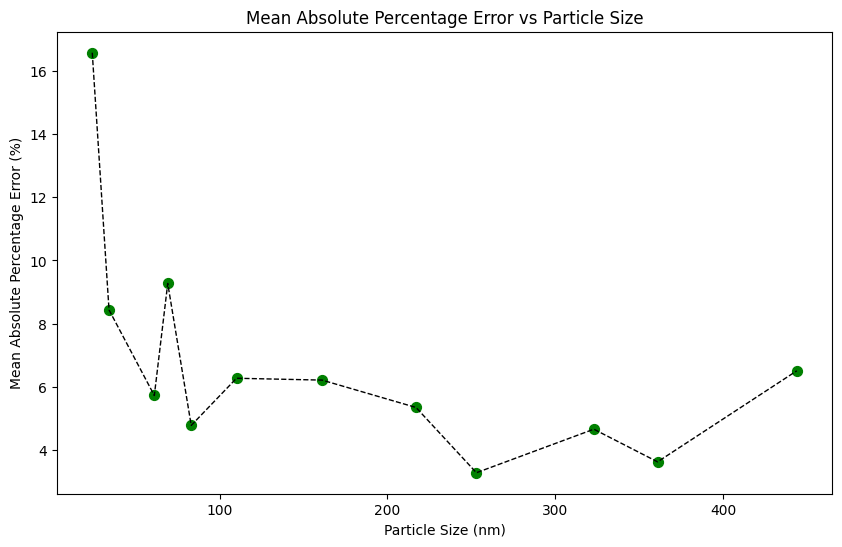

In [7]:
### Mean Absolute Percentage Error vs Particle Size ###

df['denormed_targets_rounded'] = df['denormed_targets'].round(0)

ape_vs_size = df.groupby('denormed_targets_rounded')['ape'].mean()

plt.figure(figsize=(10, 6))
plt.plot(ape_vs_size.index, ape_vs_size.values, color='black', linestyle='--', linewidth=1)
plt.scatter(ape_vs_size.index, ape_vs_size.values, marker='o', color='green', s=50)
plt.xlabel('Particle Size (nm)')
plt.ylabel('Mean Absolute Percentage Error (%)')
plt.title('Mean Absolute Percentage Error vs Particle Size')
plt.show()